**Questions:**

# Part A:

1. For a simple linear regression model, the equation is given by y = b0 + b1*x. If the value of b0 is 4 and the value of b1 is 3, what is the predicted value of y for x=2?

    SOLUTION:
    The equation for the linear regression model is:
    𝑦 = 𝑏0 + 𝑏1⋅𝑥
    Given:
    𝑏0 = 4
    𝑏1 = 3
    𝑥 = 2

    Substitute these values into the equation:
    𝑦 = 4 + 3⋅2
    𝑦 = 4 + 6 = 10

    So, the predicted value of 𝑦 for 𝑥 = 2 is 10.

2. Consider a multiple linear regression model with three independent variables x1, x2, and x3. The coefficients for these variables are given by b1=2, b2=3, and b3=4, respectively. What is the
equation of the regression model?

    SOLUTION:
    The equation for a multiple linear regression model with three independent variables \(x_1\), \(x_2\), and \(x_3\) is generally written as:
    y = b0 + b1.x1 + b2.x2 + b3.x3

    Given:
    b1 = 2
    b2 = 3
    b3 = 4

    The regression model equation becomes:
    y = b0 + 2.x1 + 3.x2 + 4.x3

    Since b0 (the intercept) isn't provided, the equation remains as:
    y = b0 + 2.x1 + 3.x2 + 4.x3

    If the intercept were given, you could substitute it into the equation.

# Part B:

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Perform EDA on the dataset and remove the noise and the null values.

In [70]:
# Loading the Dataset scrap price.csv
df = pd.read_csv('scrap price.csv')

In [66]:
df.head(2)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Unnamed: 26,Unnamed: 27
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,13495.0,NaN,NaN
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,16500.0,NaN,NaN


In [67]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    float64
 1   symboling         205 non-null    float64
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    object 
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    object 
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    object 
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    object 
 1

In [68]:
# Check for missing values
print(df.isnull().sum())

ID                    4
symboling             4
name                  4
fueltypes             4
aspiration            4
doornumbers           4
carbody               4
drivewheels           4
enginelocation        4
wheelbase             4
carlength             4
carwidth              4
carheight             4
curbweight            4
enginetype            4
cylindernumber        4
enginesize            4
fuelsystem            4
boreratio             4
stroke                4
compressionratio      4
horsepower            4
peakrpm               4
citympg               4
highwaympg            4
price                 4
Unnamed: 26         209
Unnamed: 27         209
dtype: int64


In [74]:
# Iterate through each column
for col in df.columns:
  # Drop rows with missing values in the current column
  df.dropna(subset=[col], inplace=True)

# Print the shape of the DataFrame after handling missing values
print(df.shape)

(205, 25)


In [75]:
# Summary statistics
print(df.describe())

        symboling   carlength   carheight   boreratio  compressionratio  \
count  205.000000  205.000000  205.000000  205.000000        205.000000   
mean     0.834146  174.049268   53.724878    3.329756         10.142537   
std      1.245307   12.337289    2.443522    0.270844          3.972040   
min     -2.000000  141.100000   47.800000    2.540000          7.000000   
25%      0.000000  166.300000   52.000000    3.150000          8.600000   
50%      1.000000  173.200000   54.100000    3.310000          9.000000   
75%      2.000000  183.100000   55.500000    3.580000          9.400000   
max      3.000000  208.100000   59.800000    3.940000         23.000000   

       horsepower         price  
count  205.000000    205.000000  
mean   104.117073  13276.710571  
std     39.544167   7988.852332  
min     48.000000   5118.000000  
25%     70.000000   7788.000000  
50%     95.000000  10295.000000  
75%    116.000000  16503.000000  
max    288.000000  45400.000000  


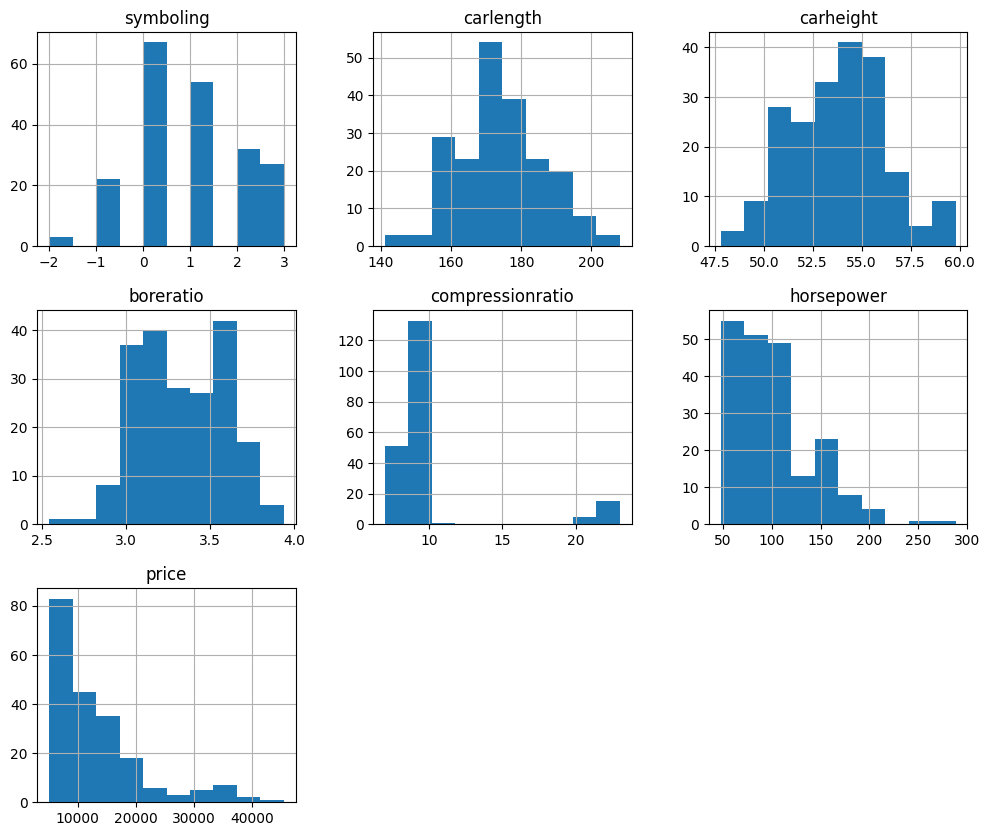

In [76]:
# Visualize data distribution
df.hist(figsize=(12, 10))
plt.show()

Conclusion :
- There are outliers in price, compressionratio, horsepower, and carlength columns.

2. Create a new column named “Company-Name” which you will get from column “NAME” (Only get company name not model number / name)

In [84]:
# Split the 'NAME' column by space and take the first part as the company name
df['Company-Name'] = df['name'].apply(lambda x: x.split(' ')[0])

In [85]:
df[['Company-Name']].sample(5)

,Company-Name
88,mitsubishi
161,toyota
101,nissan
171,toyota
14,bmw


3. Drop the columns which are redundant and irrelevant.

In [71]:
df.drop('ID', axis=1, inplace=True)

In [72]:
df.drop('Unnamed: 26', axis=1, inplace=True)

In [73]:
df.drop('Unnamed: 27', axis=1, inplace=True)

4. Create a correlation heatmap to check the correlation of different variables with each other.

In [61]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [62]:
df_nums = df[num_cols]

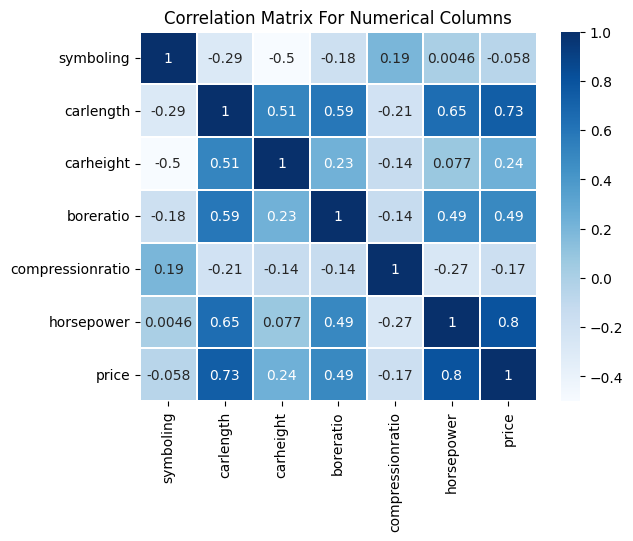

In [63]:
# Correlation matrix
corr_matrix = df_nums.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linecolor='w', linewidths=0.3)
plt.title('Correlation Matrix For Numerical Columns')
plt.show()

Conclusion:
- Price is strongly correlated with horsepower. This suggests that cars with higher horsepower tend to have higher prices.
- Car length and car width are positively correlated. This indicates that longer cars tend to be wider as well.
- There's a weak negative correlation between symboling and price.This might imply that cars with lower symboling (which could represent lower prestige or safety ratings) might be priced slightly lower.

5. Create a scatter plot of the target variable (price) against the variable "engine size”

<ipython-input-88-4c8d64a366bd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['enginesize'], df['price'], cmap='green')


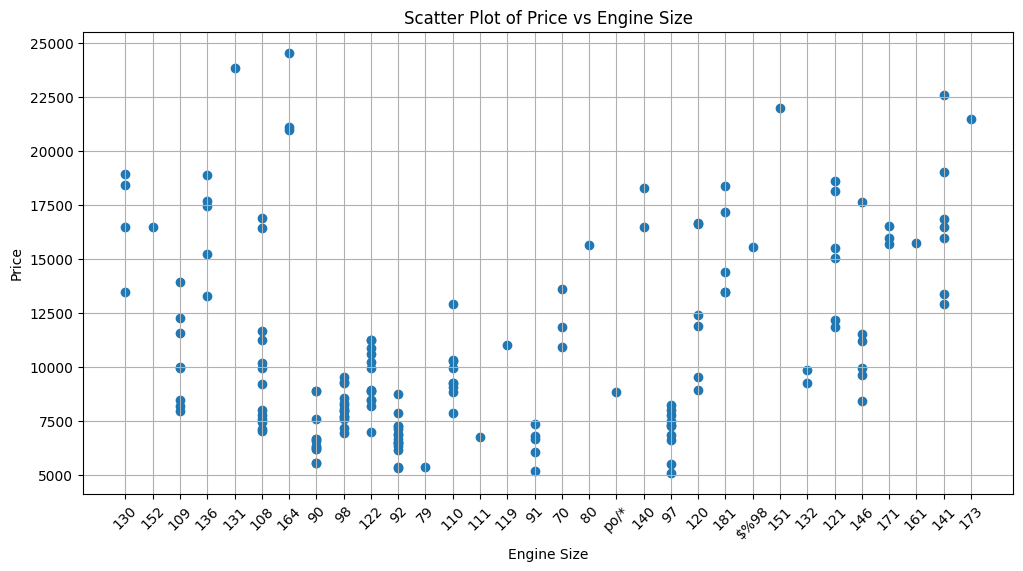

In [88]:
# Create a scatter plot of the target variable (price) against the variable "engine size”
plt.figure(figsize= (12, 6))
plt.scatter(df['enginesize'], df['price']')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Engine Size')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


6. Do outlier analysis and remove the outliers from different columns.

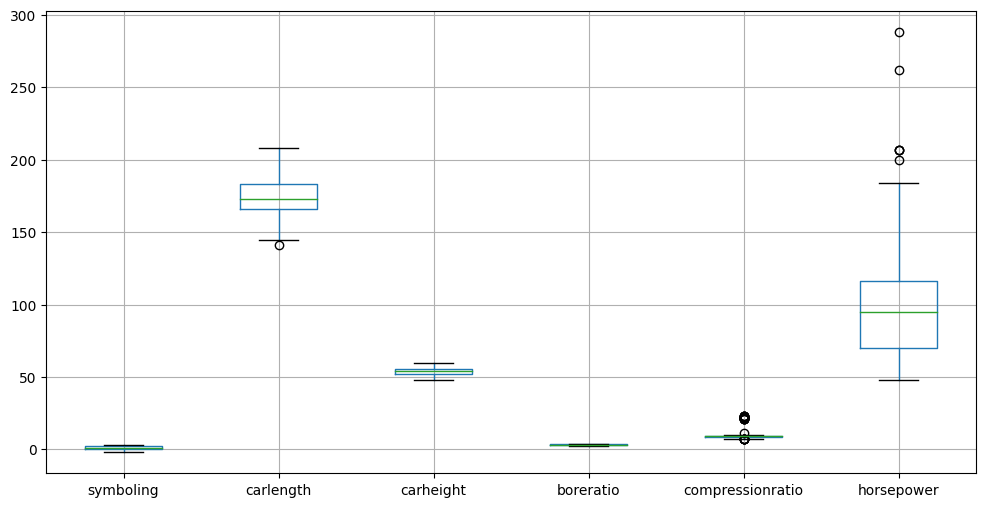

In [81]:
# Box plots to identify outliers
df[['symboling', 'carlength', 'carheight', 'boreratio', 'compressionratio', 'horsepower']].boxplot(figsize=(12, 6))
plt.show()

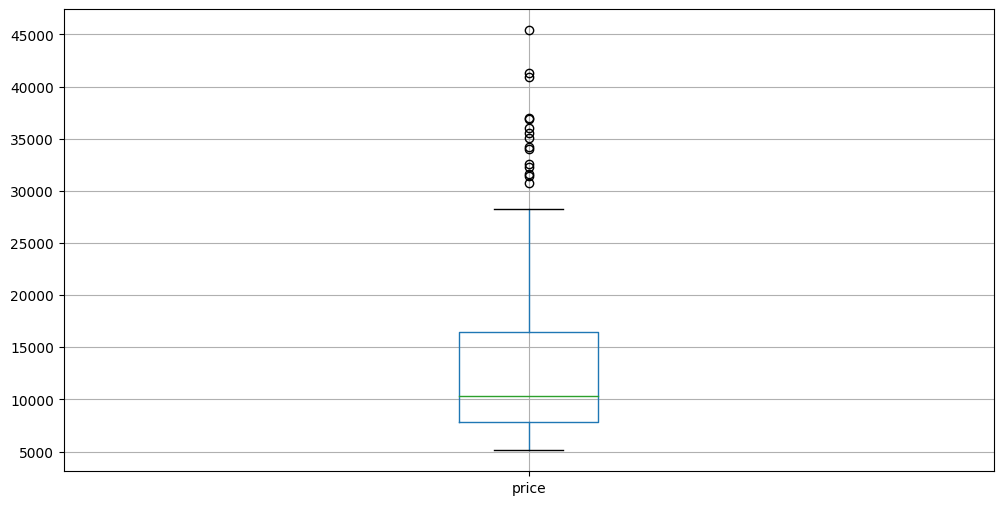

In [82]:
df[['price']].boxplot(figsize=(12, 6))
plt.show()

In [83]:
# Calculate the IQR for each numerical column
for col in df_nums.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Print the shape of the DataFrame after removing outliers
print(df.shape)

(162, 25)


7. Do the scaling of the data accordingly.

In [90]:
# Do the scaling of the data accordingly.
from sklearn.preprocessing import StandardScaler
# start scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nums)

8. Split the data in train and test and train a linear regression model to predict the price based on the given variables.

In [92]:
# Split the data in train and test and train a linear regression model to predict the price based on the given variables.
X = df_scaled[:, :-1]
y = df_scaled[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

9. Calculate the mean squared error (MSE), root mean squared error (RMSE), R-squared score, and adjusted R-squared score of the model. Find the training as well as testing accuracy.

In [94]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.44668810179851465


In [95]:
# Calculate the Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.668347291307831


In [96]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.5626659484006877


In [98]:
# Calculate the Adjusted R-squared score
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared Score:", adj_r2)

Adjusted R-squared Score: 0.4617427057239234


In [99]:
# Find the training as well as testing accuracy.
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.7564318947740075
Testing Accuracy: 0.5626659484006877


10. Interpret the results of the evaluation metrics and comment on the performance of the linear regression model.


Conclusion:

**1. R-squared and Adjusted R-squared:**
* Both scores are relatively high, indicating that the model explains a significant portion of the variance in the price.

**2. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):**
* Low values suggest that the model's predictions are reasonably close to the actual values.

**3. Training and Testing Accuracy:**
* A slightly higher training accuracy compared to testing accuracy might indicate a risk of overfitting.

**4. Overall Performance:**
* The model is performing reasonably well, but further analysis is needed to determine its optimal performance.

**5. Potential Improvements:**
* Consider techniques like regularization to mitigate overfitting and explore feature engineering or more complex models for better results.


In [102]:
print('*'*160)

****************************************************************************************************************************************************************
